# <span style='color:Gainsboro; font-size:45px'>Projeto de Estudo em Ciência de Dados</span>


## <span style='color:SteelBlue; font-size:25px'>Projeto - Sistema de Recomendações</span>

<span style='color:Gray; font-size:15px'>Desenvolvido por: Alan Figueroa</span>

#### Objetivo
Criar um sistemas de recomendações baseados em gênero, atores e filmes. Iremos também analisar a rentabilidade e outras peculiaridades.

#### dados
Dados coletados no endereço https://github.com/wilsonify/TMDB

In [229]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
import warnings
warnings.filterwarnings('ignore')
# obs: pode haver outras importações no decorrer do notebook.

In [248]:
# Altere caso queira...
pd.options.display.max_columns = 35
pd.options.display.max_rows = 100

In [3]:
# Carregando os dados
data = pd.read_csv('movie_metadata.csv')

In [4]:
data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [5]:
# Tipo das colunas
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
# Valores ausentes
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
# Para o sistemas não iremos utilizar as seguintes colunas:
data.drop(columns=['color',
                   'director_facebook_likes',
                   'actor_3_facebook_likes',
                   'actor_1_facebook_likes',
                   'actor_2_facebook_likes',
                   'cast_total_facebook_likes',
                   'facenumber_in_poster',
                   'content_rating',
                   'country',
                   'movie_imdb_link',
                   'aspect_ratio',
                   'plot_keywords'], inplace=True)

#### Tratando valores ausentes

In [9]:
# Retirando os valores Nan (eliminando as observações) de 'gross' e 'budget':
data.dropna(subset=['gross','budget'], inplace=True)

In [10]:
# Retirando as observaçòes que contem mais de dois atributos ausentes:
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [11]:
# Completando os valores ausentes:
data['duration'].fillna(data['duration'].mean(), inplace=True)
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['actor_2_name'].fillna('Unknown Actor', inplace=True)
data['actor_3_name'].fillna('Unknown Actor', inplace=True)
data['language'].fillna(data['language'].mode()[0], inplace=True)

#### Limpeza

In [12]:
data.select_dtypes(include=object).columns

Index(['director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'language'],
      dtype='object')

In [13]:
# Retirando espaços em branco das strings
for col in data.select_dtypes(include=object).columns:
    data[col] = data[col].str.strip()

#### Retirando observações Duplicadas

In [14]:
# número de observações duplicadas COMPLETAMENTE
data.duplicated().sum()

35

In [15]:
data.drop_duplicates(keep='first', inplace=True)

In [16]:
data.duplicated(subset=['movie_title', 'director_name']).sum()

66

Existem observações duplicadas mas que somente mudam o número de 'num_voted_users' exemplo:

In [17]:
data[data['movie_title'] == 'Ghostbusters']

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
150,Paul Feig,464.0,116.0,Kate McKinnon,118099659.0,Action|Comedy|Fantasy|Sci-Fi,Ed Begley Jr.,Ghostbusters,69757,Zach Woods,1211.0,English,144000000.0,2016.0,5.5,62000
1582,Paul Feig,464.0,116.0,Kate McKinnon,118099659.0,Action|Comedy|Fantasy|Sci-Fi,Ed Begley Jr.,Ghostbusters,69790,Zach Woods,1211.0,English,144000000.0,2016.0,5.5,62000


In [18]:
data[data['movie_title'] == 'The Fast and the Furious']

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
100,Rob Cohen,187.0,106.0,Vin Diesel,144512310.0,Action|Crime|Thriller,Paul Walker,The Fast and the Furious,272223,Jordana Brewster,988.0,English,38000000.0,2001.0,6.7,14000
1332,Rob Cohen,187.0,106.0,Vin Diesel,144512310.0,Action|Crime|Thriller,Paul Walker,The Fast and the Furious,272227,Jordana Brewster,988.0,English,38000000.0,2001.0,6.7,14000


In [19]:
# Removendo exemplos acima mensionados:
# (colocarei todos estes termos por segurança)
data.drop_duplicates(subset=['movie_title',
                             'director_name',
                             'title_year',
                             'actor_1_name',
                             'imdb_score','movie_facebook_likes','gross'], inplace=True)

#### Feature engineering

In [20]:
# Alterando a escala dos valores:
data['gross'] = round(data['gross']/1000000,3)
data['budget'] = round(data['budget']/1000000,3)

In [21]:
# Criando coluna de lucro
data['profit'] = data['gross'] - data['budget']

In [22]:
# Top 10 filmes que mais lucraram
top_mov_profit = data[['movie_title','profit']].sort_values(by='profit', ascending=False).reset_index(drop=True).head(10)
top_mov_profit

,movie_title,profit
0,Avatar,523.506
1,Jurassic World,502.177
2,Titanic,458.672
3,Star Wars: Episode IV - A New Hope,449.936
4,E.T. the Extra-Terrestrial,424.449
5,The Avengers,403.280
6,The Lion King,377.784
7,Star Wars: Episode I - The Phantom Menace,359.545
8,The Dark Knight,348.316
9,The Hunger Games,329.999


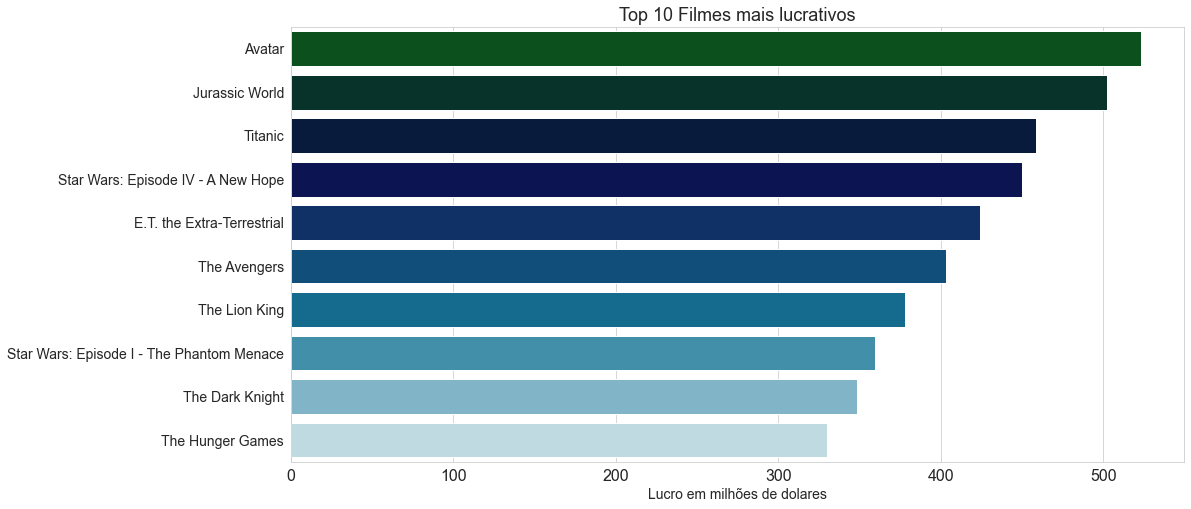

In [23]:
# Plot
fig = plt.figure(figsize=(16,8))
fig = sns.set_style(style='whitegrid')
fig = sns.barplot(data=top_mov_profit, y='movie_title',x='profit', palette='ocean')
plt.yticks(size=14)
plt.xticks(size=16)
plt.ylabel(None)
plt.xlabel('Lucro em milhões de dolares', size=14)
plt.title('Top 10 Filmes mais lucrativos', size=18)
plt.show()

In [24]:
# Filmes de lingua estrangeira (não inglesa):
(data['language'] != 'English').sum()

180

In [25]:
# Função para classificação atributo language
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

data['language'] = data['language'].apply(lambda x: language(x))
data.language.value_counts()

English    3607
Foreign     180
Name: language, dtype: int64

In [26]:
# Classificando coluna 'duration' em duas classes; curtos e longos:
def duration(x):
    if x > 120:
        return 'long'
    else:
        return 'short'
data['duration'] = data['duration'].apply(lambda x: duration(x))
data['duration'].value_counts()

short    2888
long      899
Name: duration, dtype: int64

In [27]:
# Separando uma string de generos em uma listas com generos:
data['movie_genres'] = data['genres'].str.split('|')
# criando colunas de generos
data['genre_1'] = data['movie_genres'].apply(lambda x: x[0])
data['genre_2'] = data['movie_genres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['genre_3'] = data['movie_genres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['genre_4'] = data['movie_genres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

In [28]:
data[['genres','genre_1','genre_2','genre_3','genre_4']].head()

,genres,genre_1,genre_2,genre_3,genre_4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


In [29]:
catego = {}
for i in data['genres']:
    lista = i.split('|')
    for g in lista:
        if g not in catego:
            catego[g] = 1
        else:
            catego[g] += 1

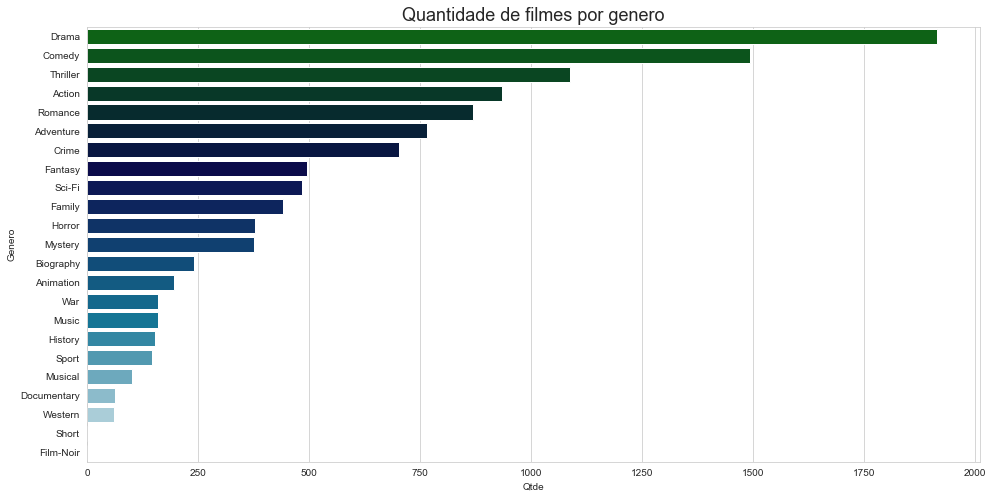

In [30]:
# VErificando filmes por genero
df_genres = pd.DataFrame(catego.items(), columns=['Genero','Qtde']).sort_values(by='Qtde', ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(data=df_genres, y='Genero', x='Qtde', palette='ocean')
plt.title('Quantidade de filmes por genero', size=18)
plt.show()

In [31]:
# Cálculo da média de popularidade de um filme:
data['social_popularity_media'] = ((data['num_user_for_reviews'] /data['num_voted_users']) * data['movie_facebook_likes']) / 1000000

In [32]:
df_popularity = data[['movie_title','director_name','social_popularity_media']]\
                .sort_values(by='social_popularity_media', ascending=False)\
                .head(10).reset_index(drop=True)
df_popularity

,movie_title,director_name,social_popularity_media
0,Batman v Superman: Dawn of Justice,Zack Snyder,0.001600
1,Ghostbusters,Paul Feig,0.001076
2,Interstellar,Christopher Nolan,0.001025
3,10 Days in a Madhouse,Timothy Hines,0.000828
4,Into the Woods,Rob Marshall,0.000693
5,Suicide Squad,David Ayer,0.000653
6,Fifty Shades of Grey,Sam Taylor-Johnson,0.000624
7,Warcraft,Duncan Jones,0.000623
8,Independence Day: Resurgence,Roland Emmerich,0.000599
9,The Revenant,Alejandro G. Iñárritu,0.000556


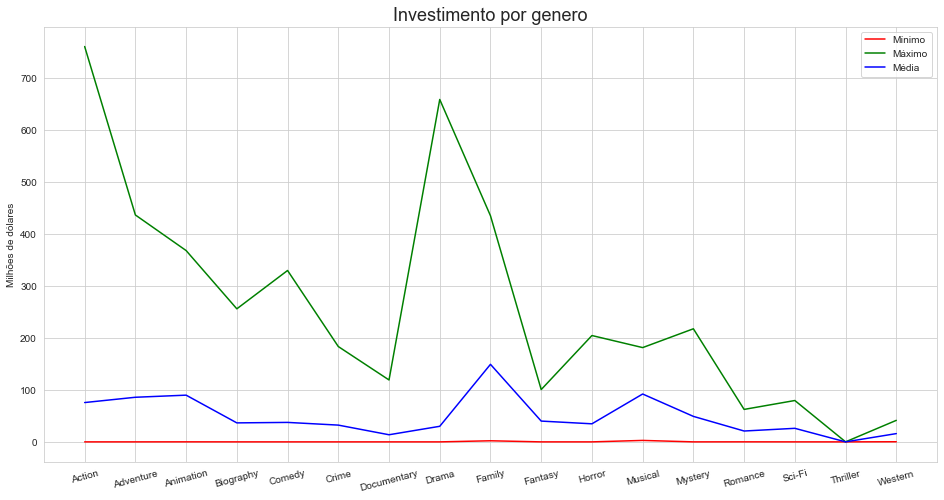

In [33]:
# Comparando investimento por gêneros
display(data[['genre_1','gross']].groupby(['genre_1']).agg(['min','max','mean']).style.background_gradient(cmap='YlOrRd'))

fig = data[['genre_1','gross']].groupby(['genre_1']).agg(['min','max','mean']).plot(kind='line', color=['red','green','blue'], figsize=(16,8))
plt.legend(['Mínimo','Máximo','Média'])
plt.title('Investimento por genero', size=18)
plt.ylabel('Milhões de dólares')
plt.xlabel(None)
plt.xticks(ticks=np.arange(17), labels=np.sort(data['genre_1'].unique()), rotation=15)
plt.show()

In [34]:
# Filmes com maior faturamento por gênero
display(data.loc[data.groupby(data['genre_1'])['profit']\
            .idxmax()][['genre_1','movie_title','gross']]\
            .style.background_gradient(cmap='YlOrRd'))

,genre_1,movie_title,gross
0,Action,Avatar,760.506000
509,Adventure,The Lion King,422.784000
521,Animation,Despicable Me 2,368.050000
1403,Biography,The Blind Side,255.950000
836,Comedy,Forrest Gump,329.691000
3466,Crime,The Godfather,134.822000
3583,Documentary,Fahrenheit 9/11,119.078000
26,Drama,Titanic,658.672000
3080,Family,E.T. the Extra-Terrestrial,434.949000
2485,Fantasy,The Others,96.472000


In [35]:
print('Anos mais lucrativos para a industria do cinema')
data['title_year'] = data['title_year'].astype('int')
data.groupby(['language', 'title_year'])[['profit']].agg('sum').sort_values(by='profit', ascending=False).head(10).style.background_gradient(cmap='ocean_r')

Anos mais lucrativos para a industria do cinema


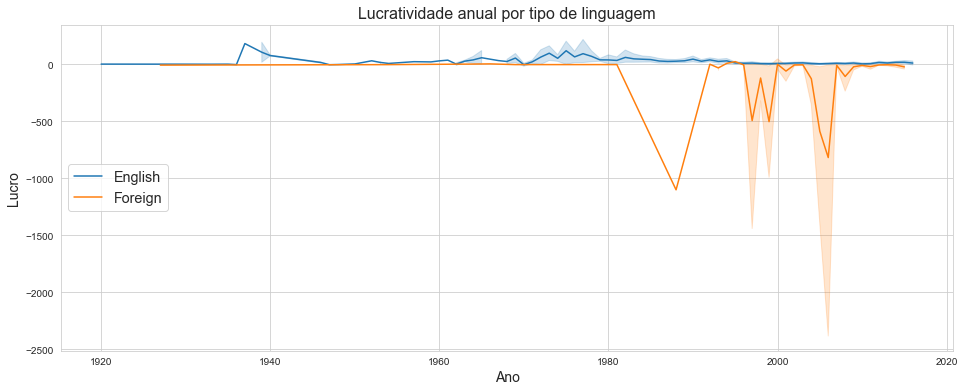

In [36]:
plt.figure(figsize=(16,6))
sns.lineplot(x=data['title_year'], y=data['profit'], hue=data['language'])
plt.legend(fontsize='x-large', loc=6)
plt.xlabel('Ano', size=14)
plt.ylabel('Lucro', size=14)
plt.title('Lucratividade anual por tipo de linguagem', size=16)
plt.show()

In [37]:
# Maiores perdas do cinema:
print('Filmes com maiores perdas (prejuízo) em milhões de dolares')
data[data['profit'] < 0][['movie_title','title_year','language','profit']]\
    .sort_values(by='profit', ascending=True).head(10).reset_index(drop=True)\
    .style.background_gradient(cmap='Reds_r', subset='profit')

Filmes com maiores perdas (prejuízo) em milhões de dolares


,movie_title,title_year,language,profit
0,The Host,2006,Foreign,-12213.299000
1,Lady Vengeance,2005,Foreign,-4199.788000
2,Fateless,2005,Foreign,-2499.804000
3,Princess Mononoke,1997,Foreign,-2397.702000
4,Steamboy,2004,Foreign,-2127.110000
5,Akira,1988,Foreign,-1099.561000
6,Godzilla 2000,1999,Foreign,-989.963000
7,Tango,1998,Foreign,-698.313000
8,Kabhi Alvida Naa Kehna,2006,Foreign,-696.725000
9,Kites,2010,English,-598.398000


Filmes Longos


,movie_title,duration,gross,profit
0,Avatar,long,760.506000,523.506000
1,Jurassic World,long,652.177000,502.177000
2,Titanic,long,658.672000,458.672000
3,Star Wars: Episode IV - A New Hope,long,460.936000,449.936000
4,The Avengers,long,623.280000,403.280000



Filmes Curtos


,movie_title,duration,gross,profit
0,E.T. the Extra-Terrestrial,short,434.949000,424.449000
1,The Lion King,short,422.784000,377.784000
2,Deadpool,short,363.024000,305.024000
3,Despicable Me 2,short,368.050000,292.050000
4,Finding Nemo,short,380.839000,286.839000


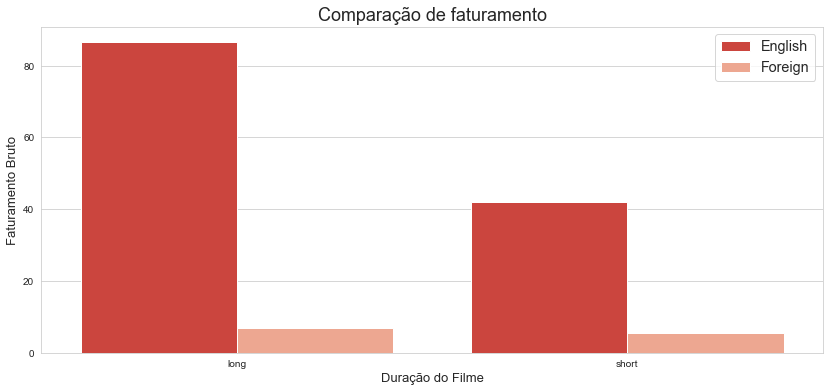

In [55]:
# Long Movies
print('Filmes Longos')
display(data[data['duration'] == 'long'][['movie_title','duration','gross','profit']]\
        .sort_values(by='profit', ascending=False).head(5).reset_index(drop=True)\
        .style.background_gradient(cmap='Reds'))

# Short Movies
print('\nFilmes Curtos')
display(data[data['duration'] == 'short'][['movie_title','duration','gross','profit']]\
        .sort_values(by='profit', ascending=False).head(5).reset_index(drop=True)\
        .style.background_gradient(cmap='Reds'))

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=data['duration'], y=data['gross'], hue=data['language'], ci=False, palette='Reds_r')
plt.title('Comparação de faturamento', size=18)
plt.ylabel('Faturamento Bruto', size=13)
plt.xlabel('Duração do Filme', size=13)
plt.legend(fontsize='x-large')
plt.show()

In [38]:
data[data['duration'] == 'long'].groupby(['language']).agg({'budget':['count','sum','mean'], 'gross':['sum','mean']}).reset_index()

language budget                             gross           
            count        sum        mean        sum       mean
0  English    837  51123.318   61.079233  72419.652  86.522882
1  Foreign     62   8824.787  142.335274    420.420   6.780968

In [56]:
data[data['language'] == 'English']

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,movie_genres,genre_1,genre_2,genre_3,genre_4,social_popularity_media
0,James Cameron,723.0,long,Joel David Moore,760.506,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237.000,2009,7.9,33000,523.506,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi,0.000114
1,Gore Verbinski,302.0,long,Orlando Bloom,309.404,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300.000,2007,7.1,0,9.404,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action,0.000000
2,Sam Mendes,602.0,long,Rory Kinnear,200.074,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245.000,2015,6.8,85000,-44.926,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action,0.000306
3,Christopher Nolan,813.0,long,Christian Bale,448.131,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250.000,2012,8.5,164000,198.131,"[Action, Thriller]",Action,Thriller,Action,Action,0.000387
5,Andrew Stanton,462.0,long,Samantha Morton,73.059,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,738.0,English,263.700,2012,6.6,24000,-190.641,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,John Waters,73.0,short,Mink Stole,0.180,Comedy|Crime|Horror,Divine,Pink Flamingos,16792,Edith Massey,183.0,English,0.010,1972,6.1,0,0.170,"[Comedy, Crime, Horror]",Comedy,Crime,Horror,Comedy,0.000000
5033,Shane Carruth,143.0,short,David Sullivan,0.425,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,Casey Gooden,371.0,English,0.007,2004,7.0,19000,0.418,"[Drama, Sci-Fi, Thriller]",Drama,Sci-Fi,Thriller,Drama,0.000097
5034,Neill Dela Llana,35.0,short,Edgar Tancangco,0.070,Thriller,Ian Gamazon,Cavite,589,Quynn Ton,35.0,English,0.007,2005,6.3,74,0.063,[Thriller],Thriller,Thriller,Thriller,Thriller,0.000004
5037,Edward Burns,14.0,short,Caitlin FitzGerald,0.005,Comedy|Drama,Kerry Bishé,Newlyweds,1338,Daniella Pineda,14.0,English,0.009,2011,6.4,413,-0.004,"[Comedy, Drama]",Comedy,Drama,Comedy,Comedy,0.000004


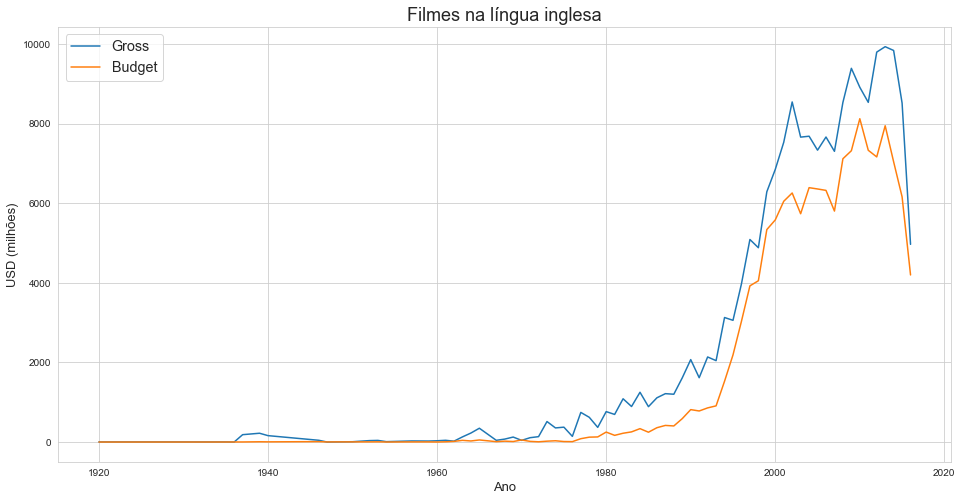

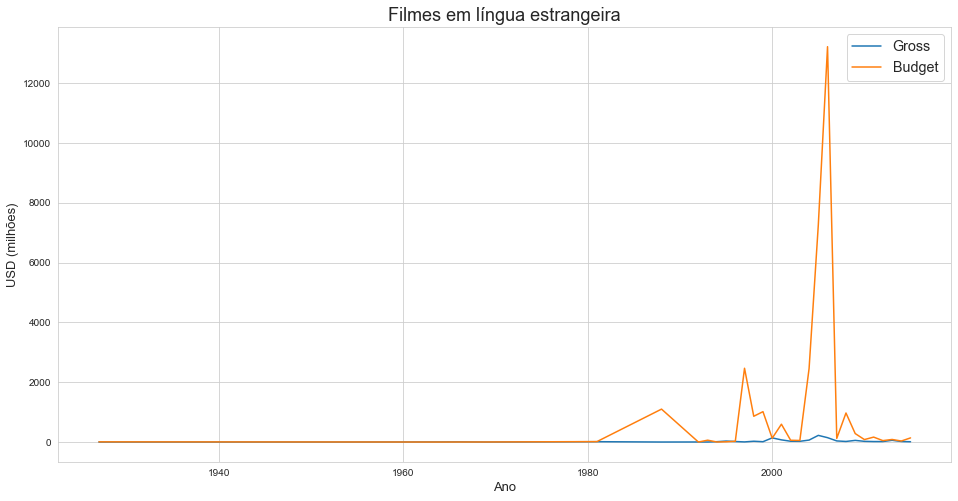

In [172]:
df_english = data[data['language'] == 'English'].groupby(['title_year'])[['gross','budget']].sum()
plt.figure(figsize=(16,8))
sns.lineplot(data=df_english, x='title_year', y='gross', label='Gross')
sns.lineplot(data=df_english, x='title_year', y='budget', label='Budget')
plt.title('Filmes na língua inglesa', size=18)
plt.ylabel('USD (milhões)', size=13)
plt.xlabel('Ano', size=13)
plt.legend(fontsize='x-large')
plt.show()


df_foreign = data[data['language'] == 'Foreign'].groupby(['title_year'])[['gross','budget']].sum()
plt.figure(figsize=(16,8))
sns.lineplot(data=df_foreign, x='title_year', y='gross', label='Gross')
sns.lineplot(data=df_foreign, x='title_year', y='budget', label='Budget')
plt.title('Filmes em língua estrangeira', size=18)
plt.ylabel('USD (milhões)', size=13)
plt.xlabel('Ano', size=13)
plt.legend(fontsize='x-large')
plt.show()

In [116]:
# Média da pontuação do IMDB Score para filmes de longa e curta duração:
avg_dur_long = data[data['duration']=='long']['imdb_score'].mean()
print(f'Média IMDB Score filmes LONGOS : {round(avg_dur_long,2)}')
avg_dur_short = data[data['duration']=='short']['imdb_score'].mean()
print(f'Média IMDB Score filmes CURTOS : {round(avg_dur_short,2)}')

Média IMDB Score filmes LONGOS : 7.06
Média IMDB Score filmes CURTOS : 6.27


In [160]:
print('Filme longo com a maior pontuação IMDB Score')
display(data.loc[data[data['duration']=='long']['imdb_score'].idxmax()][['movie_title','title_year','imdb_score']])

Filme longo com a maior pontuação IMDB Score


movie_title    The Shawshank Redemption
title_year                         1994
imdb_score                          9.3
Name: 1937, dtype: object

In [159]:
print('Filme curto com a maior pontuação IMDB Score')
display(data.loc[data[data['duration']=='short']['imdb_score'].idxmax()][['movie_title','title_year','imdb_score']])

Filme curto com a maior pontuação IMDB Score


movie_title    American History X
title_year                   1998
imdb_score                    8.6
Name: 3175, dtype: object

In [156]:
# Verificando pódio (social_popularity_media usado como critério de desempate)
data[data['duration']=='long'][['movie_title','imdb_score','social_popularity_media']].sort_values(by=['imdb_score','social_popularity_media'], ascending=False).head(3)

,movie_title,imdb_score,social_popularity_media
1937,The Shawshank Redemption,9.3,0.000265
3466,The Godfather,9.2,0.000083
66,The Dark Knight,9.0,0.000103


In [157]:
# Verificando pódio (social_popularity_media usado como critério de desempate)
data[data['duration']=='short'][['movie_title','imdb_score','social_popularity_media']].sort_values(by=['imdb_score','social_popularity_media'], ascending=False).head(3)

,movie_title,imdb_score,social_popularity_media
3175,American History X,8.6,0.000064
3592,The Usual Suspects,8.6,0.000045
4427,Modern Times,8.6,0.000000


Text(0.5, 0, 'IMDB Score')

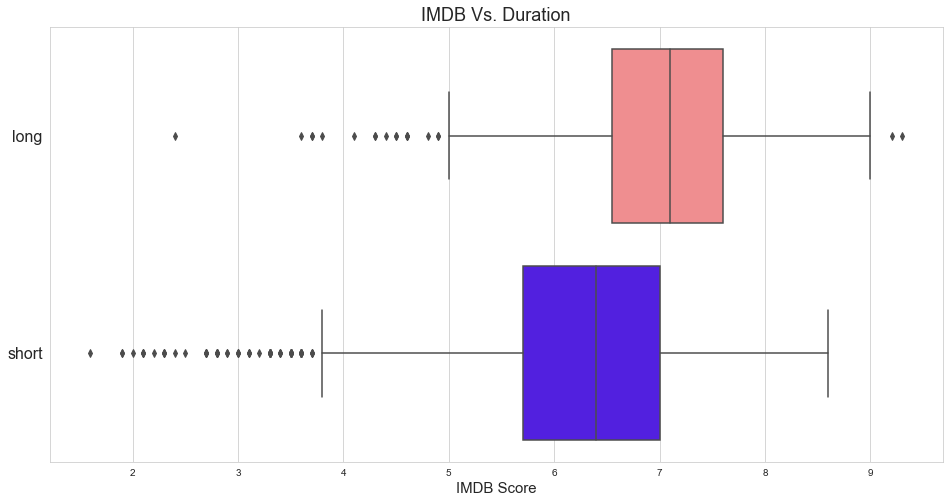

In [184]:
plt.figure(figsize=(16,8))
sns.boxplot(x=data['imdb_score'], y=data['duration'], palette='gnuplot2_r')
plt.title('IMDB Vs. Duration', size=18)
plt.yticks(size=16)
plt.ylabel(None)
plt.xlabel('IMDB Score', size=15)

In [189]:
# Criando filtro nos dados por ator para verificar a participação nos filmes:

def consulta_ator(x):
    campo1 = data[data['actor_1_name'] == x]
    campo2 = data[data['actor_2_name'] == x]
    campo3 = data[data['actor_3_name'] == x]
    conj_1 = campo1.append(campo2)
    conj_final = conj_1.append(campo3)
    
    resultado = conj_final[['movie_title','title_year','genres','imdb_score','gross','budget']].sort_values(by='title_year')
    
    return resultado

In [216]:
# Consulta Resumo de ator:
def resumo_ator(x):
    campo1 = data[data['actor_1_name'] == x]
    campo2 = data[data['actor_2_name'] == x]
    campo3 = data[data['actor_3_name'] == x]
    conj_1 = campo1.append(campo2)
    conj_final = conj_1.append(campo3)
    
    print('Intervalo de atuação(Anos) : {} - {}'.format(conj_final['title_year'].min(),conj_final['title_year'].max()))
    print("Quantidade de Filmes realizados : {}".format(len(conj_final)))
    print("Média do faturamento dos filmes : {}".format(conj_final['gross'].mean()))
    print('Valor Máximo do faturamento que participou : {}'.format(conj_final['gross'].max()))
    print('Valor mínimo do faturamento que participou : {}'.format(conj_final['gross'].min()))
    print('Números de filmes com faturamento maior que 100 milhões : {}'.format(conj_final[conj_final['gross'] > 100].shape[0]))
    print('Média geral do IMDB Score : {}'.format(round(conj_final['imdb_score'].mean(),2)))
    print('Gênero mais realizado pelo artista : {}'.format(conj_final['genre_1'].mode()[0]))

In [215]:
consulta_ator('Johnny Depp')

,movie_title,title_year,genres,imdb_score,gross,budget
1420,A Nightmare on Elm Street,1984,Horror,7.5,26.505,1.8
3582,Platoon,1986,Drama|War,8.1,137.963,6.0
2177,Edward Scissorhands,1990,Fantasy|Romance,7.9,56.362,20.0
3709,Freddy's Dead: The Final Nightmare,1991,Comedy|Fantasy|Horror|Thriller,4.9,34.872,8.5
3058,What's Eating Gilbert Grape,1993,Drama|Romance,7.8,9.170,11.0
2449,Ed Wood,1994,Biography|Comedy|Drama,7.9,5.887,18.0
1946,Don Juan DeMarco,1994,Comedy|Drama|Romance,6.8,22.200,25.0
1436,Donnie Brasco,1997,Biography|Crime|Drama,7.8,41.955,35.0
2389,Fear and Loathing in Las Vegas,1998,Adventure|Comedy|Drama,7.7,10.562,18.5
1354,The Ninth Gate,1999,Mystery|Thriller,6.7,18.654,38.0


In [217]:
resumo_ator('Johnny Depp')

Intervalo de atuação(Anos) : 1984 - 2016
Quantidade de Filmes realizados : 34
Média do faturamento dos filmes : 95.41808823529412
Valor Máximo do faturamento que participou : 423.033
Valor mínimo do faturamento que participou : 1.822
Números de filmes com faturamento maior que 100 milhões : 9
Média geral do IMDB Score : 6.85
Gênero mais realizado pelo artista : Action


In [218]:
resumo_ator('Meryl Streep')

Intervalo de atuação(Anos) : 1985 - 2014
Quantidade de Filmes realizados : 23
Média do faturamento dos filmes : 55.22939130434781
Valor Máximo do faturamento que participou : 143.704
Valor mínimo do faturamento que participou : 9.664
Números de filmes com faturamento maior que 100 milhões : 4
Média geral do IMDB Score : 6.81
Gênero mais realizado pelo artista : Drama


In [249]:


@interact(score=(0.0,10.0,0.1))
def movies_show(column='imdb_score', score = 9.0):
    x = data.loc[data[column] > score][['movie_title',
                                        'title_year',
                                        'genres',
                                        'imdb_score',
                                        'director_name',
                                        'actor_1_name',
                                        'actor_2_name',
                                        'actor_3_name',
                                        'profit']]
    
    x = x.sort_values(by='imdb_score', ascending=False)
    x = x.drop_duplicates(keep='first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [250]:
@interact
def gro_bud_pro_show(column=['gross','budget','profit'], x = 500):
    return data.loc[data[column] > x][['movie_title',
                                        'title_year',
                                        'genres',
                                        'imdb_score',
                                        'director_name',
                                        'actor_1_name',
                                        'gross',
                                        'budget',
                                        'profit']].sort_values(by=column, ascending=False)

interactive(children=(Dropdown(description='column', options=('gross', 'budget', 'profit'), value='gross'), In…

In [253]:
# Recommendação de filmes por linguagem:
def recomend_language(x):
    return data[data['language'] == x][['movie_title','imdb_score','genre_1']].sort_values(by='imdb_score', ascending=False).head(15)
    
recomend_language('Foreign')

,movie_title,imdb_score,genre_1
4498,"The Good, the Bad and the Ugly",8.9,Western
4029,City of God,8.7,Crime
4747,Seven Samurai,8.7,Action
2373,Spirited Away,8.6,Adventure
4921,Children of Heaven,8.5,Drama
4259,The Lives of Others,8.5,Drama
3931,Samsara,8.5,Documentary
4659,A Separation,8.4,Drama
1329,Baahubali: The Beginning,8.4,Action
2970,Das Boot,8.4,Adventure


In [261]:
# Recomandação de filme por ator:
def recomend_actor(x):
    
    campo1 = data[data['actor_1_name'] == x]
    campo2 = data[data['actor_2_name'] == x]
    campo3 = data[data['actor_3_name'] == x]
    conj = campo1.append(campo2)
    conj_final = conj.append(campo3)
    
    return conj_final[['movie_title','imdb_score','genres']].sort_values(by='imdb_score', ascending=False).head(15)

recomend_actor('Robert Downey Jr.')

,movie_title,imdb_score,genres
27,Captain America: Civil War,8.2,Action|Adventure|Sci-Fi
17,The Avengers,8.1,Action|Adventure|Sci-Fi
69,Iron Man,7.9,Action|Adventure|Sci-Fi
434,Zodiac,7.7,Crime|Drama|History|Mystery|Thriller
366,Sherlock Holmes,7.6,Action|Adventure|Crime|Mystery|Thriller
2721,Kiss Kiss Bang Bang,7.6,Comedy|Crime|Mystery
212,Sherlock Holmes: A Game of Shadows,7.5,Action|Adventure|Crime|Mystery|Thriller
8,Avengers: Age of Ultron,7.5,Action|Adventure|Sci-Fi
3477,"Good Night, and Good Luck.",7.5,Biography|Drama|History
3271,Richard III,7.5,Drama|War


In [263]:
resumo_ator('Robert Downey Jr.')

Intervalo de atuação(Anos) : 1995 - 2016
Quantidade de Filmes realizados : 28
Média do faturamento dos filmes : 126.40207142857142
Valor Máximo do faturamento que participou : 623.28
Valor mínimo do faturamento que participou : 0.221
Números de filmes com faturamento maior que 100 milhões : 10
Média geral do IMDB Score : 6.89
Gênero mais realizado pelo artista : Action


In [384]:
# Recomendação de similaridade de gênero:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns=te.columns_)
x = x.astype(int)
x.insert(0,'movie_title', data['movie_title'])
x = x.set_index('movie_title')
def recomend_genres(gen):
    gen = x[gen]
    similar_genres = x.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [385]:
recomend_genres('Animation')

Family       0.570357
Adventure    0.305355
Fantasy      0.250945
dtype: float64

In [387]:
x = x.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,Quantum of Solace,Pirates of the Caribbean: Dead Man's Chest,The Lone Ranger,Man of Steel,The Chronicles of Narnia: Prince Caspian,...,Sea Rex 3D: Journey to a Prehistoric World,The Sweet Hereafter,Of Gods and Men,Bottle Shock,NaN,Heavenly Creatures,90 Minutes in Heaven,Everything Must Go,Zero Effect,The Machinist,Light Sleeper,Kill the Messenger,Rabbit Hole,Party Monster,Green Room,NaN,Atlas Shrugged: Who Is John Galt?
Action,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0


In [391]:
#recomendação de filme por similaridade de gêneros:

def recommendation_movie(movie):    
    movie = x[movie]
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [393]:
recommendation_movie('Avatar')

movie_title
The Lone Ranger                                    1.000000
Daylight                                           1.000000
Firestarter                                        1.000000
Friday After Next                                  1.000000
Birdman or (The Unexpected Virtue of Ignorance)    1.000000
Ride Along                                         1.000000
The Chronicles of Riddick                          1.000000
Prometheus                                         1.000000
License to Wed                                     1.000000
Oz the Great and Powerful                          1.000000
Charlie's Angels: Full Throttle                    1.000000
Divergent                                          0.870572
The Grandmaster                                    0.870572
Cheaper by the Dozen 2                             0.870572
Ratatouille                                        0.870572
World War Z                                        0.870572
Taken 2                     